In [4]:

#Check TF version
import tensorflow as tf
print(tf.__version__)


2.2.0


In [3]:
#Check for GPU
tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device



In [4]:
#Check for GPU
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16374662368537941057
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 8313657811893975910
physical_device_desc: "device: XLA_CPU device"
]


In [5]:
# Check for GPU
tf.test

<module 'tensorflow._api.v2.test' from '/opt/anaconda3/envs/rec_sys/lib/python3.8/site-packages/tensorflow/_api/v2/test/__init__.py'>

In [6]:
# Is GPU enabled
if tf.test.gpu_device_name():
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
    print("Fix it")

Fix it


In [3]:

from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, \
  Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.multioutput import MultiOutputRegressor
from sklearn.multioutput import RegressorChain
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import earthpy as et 

In [10]:
## Code needed to set a new working directory

#my_path = os.path.join(et.io.HOME, 'recommender_system')
#os.mkdir(my_path)

## Set Working Directory
os.chdir(os.path.join(et.io.HOME, 'recommender_system'))

In [12]:
# Check if it worked
os.getcwd()

'/Users/chriskamerin/recommender_system'

In [13]:
# Data Import
df = pd.read_csv('data_in_use/headphones5.csv')
df1 = pd.read_csv('data_in_use/headphones2hp.csv')
df2 = pd.read_csv('data_in_use/df2.csv')

In [10]:
# reset index
df = df.sample(frac=1).reset_index(drop=True)
df1 = df1.sample(frac=1).reset_index(drop=True)
df2 = df2.sample(frac=1).reset_index(drop=True)

In [11]:
#Categorical codes for user id
df['user_id']  = pd.Categorical(df.user_id).codes
df1['user_id']  = pd.Categorical(df1.user_id).codes
df2['user_id']  = pd.Categorical(df2.user_id).codes


In [12]:
#Cetegorical codes for headphone names
df['headphone_name']  = pd.Categorical(df.headphone_name).codes
df1['headphone_name']  = pd.Categorical(df1.headphone_name).codes
df2['headphone_name']  = pd.Categorical(df2.headphone_name).codes


In [13]:
#Set columns we want to normalize

cols_to_norm = ['sound_quality_importance', 'positional_importance', 'loud_importance',
       'mic_importance', 'wireless_importance','noise_canceling_importance', 'in_ear_importance',
       'on_ear_importance', 'over_ear_importance', 'no_pref_oninover', 'recording_quality', 'noise_handling','user_rating',
       'Impedance', 'sensitivity(dbv)', 'accuracy',
       'weighted_harmonic_distortion', 'soundstage', 'imaging',
       'noise_isolation', 'wireless']
imp_col = ['sound_quality_importance', 'positional_importance', 'loud_importance',
       'mic_importance', 'wireless_importance', 
       'price_sensitivity']
#price_col = ['max_price','price']
hp_feat_col = ['recording_quality', 'noise_handling', 'accuracy',
       'weighted_harmonic_distortion', 'soundstage', 'imaging',
       'noise_isolation', 'wireless']
remaining_col = ['Impedance', 'sensitivity(dbv)']




In [14]:
print('feat col min:' + str(min(df[hp_feat_col].min())),'feat col max:'+ str(max(df[hp_feat_col].max())),
'rem col min:'+ str(min(df[remaining_col].min())),'rem col max:'+str(max(df[remaining_col].max())))

feat col min:0.0 feat col max:10.0 rem col min:0 rem col max:300


In [15]:
#normalize columns in df

df=df.fillna(0)
df[imp_col] = df[imp_col].apply(lambda x: (x - 0) / (10 - 0))
#df[price_col] = df[price_col].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df[hp_feat_col] = df[hp_feat_col].apply(lambda x: (x - x.min()) / (x.max() - x.min()))   
df[remaining_col] = df[remaining_col].apply(lambda x: (x - x.min()) / (x.max() - x.min()))       
#df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [16]:
cols_to_norm = ['sound_quality_importance', 'positional_importance', 'loud_importance',
       'mic_importance', 'wireless_importance', 
        'recording_quality', 'noise_handling','user_rating',
       'Impedance', 'sensitivity(dbv)', 'accuracy',
       'weighted_harmonic_distortion', 'soundstage', 'imaging',
       'noise_isolation', 'wireless']
imp_col = ['sound_quality_importance', 'positional_importance', 'loud_importance',
       'mic_importance', 'wireless_importance', 
       'price_sensitivity']
#price_col = ['max_price','price']
hp_feat_col = ['recording_quality', 'noise_handling', 'accuracy',
       'weighted_harmonic_distortion', 'soundstage', 'imaging',
       'noise_isolation', 'wireless']
remaining_col = ['Impedance', 'sensitivity(dbv)']

   

In [17]:
print('feat col min:' + str(min(df1[hp_feat_col].min())),'feat col max:'+ str(max(df1[hp_feat_col].max())),
'rem col min:'+ str(min(df1[remaining_col].min())),'rem col max:'+str(max(df1[remaining_col].max())))

feat col min:0.0 feat col max:9.2 rem col min:0 rem col max:300


In [18]:
#normalize columns in df1

df1=df1.fillna(0)
df1[imp_col] = df1[imp_col].apply(lambda x: (x - 0) / (10 - 0))
#df1[price_col] = df1[price_col].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df1[hp_feat_col] = df1[hp_feat_col].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df1[remaining_col] = df1[remaining_col].apply(lambda x: (x - x.min()) / (x.max() - x.min())) 

In [19]:
cols_to_norm = ['sound_quality_importance', 'positional_importance', 'loud_importance',
       'mic_importance', 'wireless_importance', 
        'recording_quality', 'noise_handling','user_rating',
       'Impedance', 'sensitivity(dbv)', 'accuracy',
       'weighted_harmonic_distortion', 'soundstage', 'imaging',
       'noise_isolation', 'wireless']
imp_col = ['sound_quality_importance', 'positional_importance', 'loud_importance',
       'mic_importance', 'wireless_importance', 
       'price_sensitivity']
#price_col = ['max_price','price']
hp_feat_col = ['recording_quality', 'noise_handling', 'accuracy',
       'weighted_harmonic_distortion', 'soundstage', 'imaging',
       'noise_isolation', 'wireless']
remaining_col = ['Impedance', 'sensitivity(dbv)']

 

In [20]:
print('feat col min:' + str(min(df2[hp_feat_col].min())),'feat col max:'+ str(max(df2[hp_feat_col].max())),
'rem col min:'+ str(min(df2[remaining_col].min())),'rem col max:'+str(max(df2[remaining_col].max())))

feat col min:0.0 feat col max:0.9999972902885731 rem col min:10.0 rem col max:300.0


In [21]:
#normalize columns in df2

df2=df2.fillna(0)
df2[imp_col] = df2[imp_col].apply(lambda x: (x - 0) / (10 - 0))
#df2[price_col] = df2[price_col].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df2[hp_feat_col] = df2[hp_feat_col].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df2[remaining_col] = df2[remaining_col].apply(lambda x: (x - x.min()) / (x.max() - x.min()))  

In [22]:
#Set variables for the ANN

X=df[['game_use', 'rec_use', 'studio_use', 'exercise_use',
       'office_use', 'podcast_use', 'travel_use', 'other_use',
       'sound_quality_importance', 'positional_importance', 'loud_importance',
       'mic_importance', 'wireless_importance', 'in_ear_importance',
       'on_ear_importance', 'over_ear_importance', 'no_pref_oninover']][:70]
Y=df[[ 'attached_mic', 'recording_quality',
       'noise_handling', 'Impedance', 'sensitivity(dbv)', 'accuracy',
       'weighted_harmonic_distortion', 'soundstage', 'imaging',
       'noise_isolation', 'wireless', 'over_ear_style', 'on_ear_style',
       'in_ear_style', 'open_back', 'close_back', 'semiclosed_back']][:70]
Xtest = df[['game_use', 'rec_use', 'studio_use', 'exercise_use',
       'office_use', 'podcast_use', 'travel_use', 'other_use',
       'sound_quality_importance', 'positional_importance', 'loud_importance',
       'mic_importance', 'wireless_importance', 'in_ear_importance',
       'on_ear_importance', 'over_ear_importance', 'no_pref_oninover']][70:]
Ytest = df[[ 'attached_mic', 'recording_quality',
       'noise_handling', 'Impedance', 'sensitivity(dbv)', 'accuracy',
       'weighted_harmonic_distortion', 'soundstage', 'imaging',
       'noise_isolation', 'wireless', 'over_ear_style', 'on_ear_style',
       'in_ear_style', 'open_back', 'close_back', 'semiclosed_back']][70:]

x=df1[['game_use', 'rec_use', 'studio_use', 'exercise_use',
       'office_use', 'podcast_use', 'travel_use', 'other_use',
       'sound_quality_importance', 'positional_importance', 'loud_importance',
       'mic_importance', 'wireless_importance', 'in_ear_importance',
       'on_ear_importance', 'over_ear_importance', 'no_pref_oninover']][:12]
y=df1[[ 'attached_mic', 'recording_quality',
       'noise_handling', 'Impedance', 'sensitivity(dbv)', 'accuracy',
       'weighted_harmonic_distortion', 'soundstage', 'imaging',
       'noise_isolation', 'wireless', 'over_ear_style', 'on_ear_style',
       'in_ear_style', 'open_back', 'close_back', 'semiclosed_back']][:12]
xtest=df1[['game_use', 'rec_use', 'studio_use', 'exercise_use',
       'office_use', 'podcast_use', 'travel_use', 'other_use',
       'sound_quality_importance', 'positional_importance', 'loud_importance',
       'mic_importance', 'wireless_importance', 'in_ear_importance',
       'on_ear_importance', 'over_ear_importance', 'no_pref_oninover']][12:]
ytest=df1[[ 'attached_mic', 'recording_quality',
       'noise_handling', 'Impedance', 'sensitivity(dbv)', 'accuracy',
       'weighted_harmonic_distortion', 'soundstage', 'imaging',
       'noise_isolation', 'wireless', 'over_ear_style', 'on_ear_style',
       'in_ear_style', 'open_back', 'close_back', 'semiclosed_back']][12:]
       randx=df2[['game_use', 'rec_use', 'studio_use', 'exercise_use',
       'office_use', 'podcast_use', 'travel_use', 'other_use',
       'sound_quality_importance', 'positional_importance', 'loud_importance',
       'mic_importance', 'wireless_importance', 'in_ear_importance',
       'on_ear_importance', 'over_ear_importance', 'no_pref_oninover']][:8000]
randy=df2[[ 'attached_mic', 'recording_quality',
       'noise_handling', 'Impedance', 'sensitivity(dbv)', 'accuracy',
       'weighted_harmonic_distortion', 'soundstage', 'imaging',
       'noise_isolation', 'wireless', 'over_ear_style', 'on_ear_style',
       'in_ear_style', 'open_back', 'close_back', 'semiclosed_back']][:8000]
testx =df2[['game_use', 'rec_use', 'studio_use', 'exercise_use',
       'office_use', 'podcast_use', 'travel_use', 'other_use',
       'sound_quality_importance', 'positional_importance', 'loud_importance',
       'mic_importance', 'wireless_importance', 'in_ear_importance',
       'on_ear_importance', 'over_ear_importance', 'no_pref_oninover']][8000:]
testy=df2[[ 'attached_mic', 'recording_quality',
       'noise_handling', 'Impedance', 'sensitivity(dbv)', 'accuracy',
       'weighted_harmonic_distortion', 'soundstage', 'imaging',
       'noise_isolation', 'wireless', 'over_ear_style', 'on_ear_style',
       'in_ear_style', 'open_back', 'close_back', 'semiclosed_back']][8000:]

In [34]:
# Put models in a dictionary
models = {"KNN": KNeighborsRegressor(),
          'KNN Multi' : MultiOutputRegressor(KNeighborsRegressor()),
          "Random Forest": RandomForestRegressor(),
          "Random Forest Multi": MultiOutputRegressor(RandomForestRegressor()),
          "Linear Regression": LinearRegression(),
          "Linear Regression Multi": MultiOutputRegressor(LinearRegression()),
          'Decision Tree Regression': DecisionTreeRegressor(),
          'Decision Tree Multi': MultiOutputRegressor(DecisionTreeRegressor()),
          'Ridge Regressor Chain': RegressorChain(Ridge()),
          'Ridge Regresor Multioutput': MultiOutputRegressor(Ridge())
          }
# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores



In [37]:
#Test all models on one dataset
model_scores = fit_and_score(models=models,
                             X_train=X,
                             X_test=Xtest,
                             y_train=Y,
                             y_test=Ytest)
model_scores

{'KNN': 0.35835026204101633,
 'KNN Multi': 0.3583502620410164,
 'Random Forest': 0.356531989604651,
 'Random Forest Multi': 0.33381359085884893,
 'Linear Regression': 0.4144010847084711,
 'Linear Regression Multi': 0.4137574643671443,
 'Decision Tree Regression': -0.05588620151697583,
 'Decision Tree Multi': -0.17710583017067422,
 'Ridge Regressor Chain': 0.4581229904927455,
 'Ridge Regresor Multioutput': 0.45812299049274546}

In [38]:
#Test all models on the other dataset
model_scores = fit_and_score(models=models,
                             X_train=randx,
                             X_test=testx,
                             y_train=randy,
                             y_test=testy)
model_scores

{'KNN': -0.19611926766318882,
 'KNN Multi': -0.1961192676631849,
 'Random Forest': -0.04202418744464437,
 'Random Forest Multi': -0.06528731929393937,
 'Linear Regression': -0.0026325505233496136,
 'Linear Regression Multi': -0.00263255052334977,
 'Decision Tree Regression': -1.0478184108829078,
 'Decision Tree Multi': -1.1143463249413759,
 'Ridge Regressor Chain': -0.0026269713906922213,
 'Ridge Regresor Multioutput': -0.002626971390692241}

In [118]:
#Auto encoding for dimension reduction

input_encoding_dim=5
input_vec = Input(shape=(17,))
input_encoded = Dense(input_encoding_dim,activation ='relu')(input_vec)
input_decoded = Dense(17, activation ='sigmoid')(input_encoded)
input_autoencoder = Model(input_vec, input_decoded)

In [119]:
input_encoder = Model(input_vec,input_encoded)

In [120]:
encoded_input = Input(shape=(input_encoding_dim,))

input_decoder_layer = input_autoencoder.layers[-1]

input_decoder = Model(encoded_input, input_decoder_layer(encoded_input))

In [121]:
input_autoencoder.compile(optimizer='Adam',  metrics=['accuracy'],loss = 'mse')

In [122]:
#Encode inputs
iae=input_autoencoder.fit(randx,randx,epochs=50, batch_size= 32, validation_data=(testx,testx))


Epoch 1/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.0449 - val_loss: 0.1609 - val_accuracy: 0.0095
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.1444 - accuracy: 0.0464 - val_loss: 0.1319 - val_accuracy: 0.0520
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.1225 - accuracy: 0.0685 - val_loss: 0.1150 - val_accuracy: 0.0975
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.1073 - accuracy: 0.1154 - val_loss: 0.1023 - val_accuracy: 0.1375
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0962 - accuracy: 0.1641 - val_loss: 0.0932 - val_accuracy: 0.1835
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0885 - accuracy: 0.2134 - val_loss: 0.0870 - val_accuracy: 0.2370
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0832 - accuracy: 0.2515 - val_loss: 0.0826 - val_accuracy: 0.2655
Epoch 

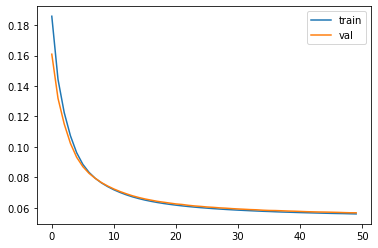

In [123]:
plt.plot(iae.history['loss'],label='loss')
plt.plot(iae.history['val_loss'],label='val_loss')
plt.legend(['train','val'])

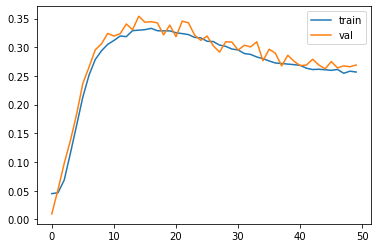

In [124]:
plt.plot(iae.history['accuracy'],label='accuracy')
plt.plot(iae.history['val_accuracy'],label='val_accuracy')
plt.legend(['train','val'])

In [66]:

output_encoding_dim=5
output_vec = Input(shape=(17,))
output_encoded = Dense(output_encoding_dim,activation ='relu')(output_vec)
output_decoded = Dense(17, activation ='sigmoid')(output_encoded)
output_autoencoder = Model(output_vec, output_decoded)


In [67]:
output_encoder = Model(output_vec,output_encoded)


In [68]:
encoded_output= Input(shape=(output_encoding_dim,))

output_decoder_layer = output_autoencoder.layers[-1]

output_decoder = Model(encoded_output, output_decoder_layer(encoded_output))

In [69]:
output_autoencoder.compile(optimizer='Adam', metrics=['accuracy'],loss = 'mse')

In [70]:
#encode outputs
ae=output_autoencoder.fit(randy,randy,epochs=50, batch_size= 32, validation_data=(testy,testy))

Epoch 1/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1337 - accuracy: 0.0504 - val_loss: 0.1121 - val_accuracy: 0.0730
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0999 - accuracy: 0.1032 - val_loss: 0.0913 - val_accuracy: 0.2140
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0827 - accuracy: 0.3219 - val_loss: 0.0775 - val_accuracy: 0.4210
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0711 - accuracy: 0.4705 - val_loss: 0.0675 - val_accuracy: 0.5090
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0624 - accuracy: 0.5290 - val_loss: 0.0601 - val_accuracy: 0.5635
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0564 - accuracy: 0.5799 - val_loss: 0.0555 - val_accuracy: 0.6040
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0526 - accuracy: 0.6184 - val_loss: 0.0523 - val_accuracy: 0.6415
Epoch 

In [76]:
encoded_outputs_for_model = output_encoder.predict(randy)

In [125]:
encoded_inputs_for_model= input_encoder.predict(randx)

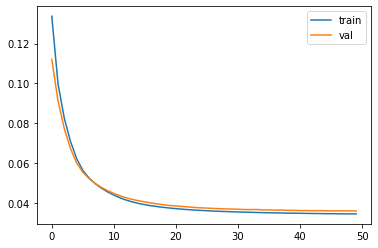

In [71]:
plt.plot(ae.history['loss'],label='loss')
plt.plot(ae.history['val_loss'],label='val_loss')
plt.legend(['train','val'])

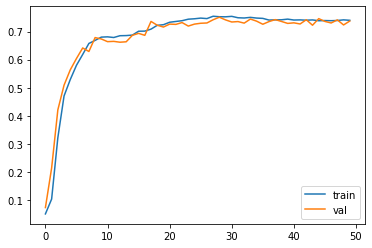

In [72]:
plt.plot(ae.history['accuracy'],label='accuracy')
plt.plot(ae.history['val_accuracy'],label='val_accuracy')
plt.legend(['train','val'])

In [151]:

ANN = tf.keras.models.Sequential([
  tf.keras.layers.Dense(108, input_shape=(17,), activation='relu'),
  tf.keras.layers.Dropout(.1),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(.1),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(.1),

  tf.keras.layers.Dense(1052, activation='relu'),
  tf.keras.layers.Dropout(.1),
  tf.keras.layers.Dense(5,activation='linear')
])

In [152]:


opt = tf.keras.optimizers.Adam(.0001)
mae = tf.keras.losses.MeanAbsoluteError()

ANN.compile(optimizer=opt,metrics=['accuracy'],loss='mse')



In [153]:
#fit to encoded outputs

r=model.fit(x=randx,y=encoded_outputs_for_model, epochs=50 ,batch_size = 32)

Epoch 1/50
250/250 [==============================] - 0s 2ms/step - loss: 9.6274 - accuracy: 0.3261
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 5.8638 - accuracy: 0.3747
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 5.8365 - accuracy: 0.3685
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 5.7848 - accuracy: 0.3736
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 5.7821 - accuracy: 0.3805
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 5.7651 - accuracy: 0.3725
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 5.7467 - accuracy: 0.3692
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 5.7462 - accuracy: 0.3755
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 5.7267 - accuracy: 0.3767
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 5.7111 - accuracy: 0.3766

In [136]:
# Plot the loss
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend(['train','val'])

KeyError: 'val_loss'

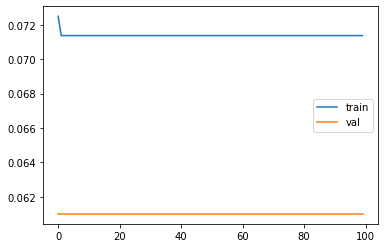

In [50]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend(['train','val'])

In [41]:
#predict from model

aanpreds = model.predict(xpred)
randaanpreds = model.predict(randxpred)
preds = model.predict(x)

In [42]:
preddf = pd.DataFrame(data=aanpreds, columns = [ 'attached_mic', 'recording_quality',
       'noise_handling', 'Impedance', 'sensitivity(dbv)', 'accuracy',
       'weighted_harmonic_distortion', 'soundstage', 'imaging',
       'noise_isolation', 'wireless', 'over_ear_style', 'on_ear_style',
       'in_ear_style', 'open_back', 'close_back', 'semiclosed_back'])
predrand = pd.DataFrame(data=randaanpreds, columns = [ 'attached_mic', 'recording_quality',
       'noise_handling', 'Impedance', 'sensitivity(dbv)', 'accuracy',
       'weighted_harmonic_distortion', 'soundstage', 'imaging',
       'noise_isolation', 'wireless', 'over_ear_style', 'on_ear_style',
       'in_ear_style', 'open_back', 'close_back', 'semiclosed_back'])
predset = pd.DataFrame(data=preds, columns = [ 'attached_mic', 'recording_quality',
       'noise_handling', 'Impedance', 'sensitivity(dbv)', 'accuracy',
       'weighted_harmonic_distortion', 'soundstage', 'imaging',
       'noise_isolation', 'wireless', 'over_ear_style', 'on_ear_style',
       'in_ear_style', 'open_back', 'close_back', 'semiclosed_back'])

In [43]:
predset

,attached_mic,recording_quality,noise_handling,Impedance,sensitivity(dbv),accuracy,weighted_harmonic_distortion,soundstage,imaging,noise_isolation,wireless,over_ear_style,on_ear_style,in_ear_style,open_back,close_back,semiclosed_back
0,0.165169,0.140674,0.475526,0.185221,0.486494,0.442387,0.474232,0.558517,0.473125,0.489655,0.201073,0.441343,0.106392,0.244583,0.179552,0.714583,0.079210
1,0.178461,0.143982,0.490851,0.190042,0.486509,0.584326,0.488156,0.575578,0.505671,0.508570,0.227641,0.473753,0.094703,0.236511,0.089466,0.711232,0.065174
2,0.165169,0.140674,0.475526,0.185221,0.486494,0.442387,0.474232,0.558517,0.473125,0.489655,0.201073,0.441343,0.106392,0.244583,0.179552,0.714583,0.079210
3,0.146601,0.130359,0.396490,0.127443,0.396647,0.395196,0.424534,0.389645,0.395401,0.453850,0.170606,0.413705,0.149087,0.180802,0.113518,0.567897,0.030935
4,0.165169,0.140674,0.475526,0.185221,0.486494,0.442387,0.474232,0.558517,0.473125,0.489655,0.201073,0.441343,0.106392,0.244583,0.179552,0.714583,0.079210
5,0.176679,0.098193,0.429788,0.127827,0.394494,0.437330,0.436730,0.390737,0.381741,0.461051,0.178498,0.424889,0.140084,0.160317,0.139325,0.577101,0.034234
6,0.176679,0.098193,0.429788,0.127827,0.394494,0.437330,0.436730,0.390737,0.381741,0.461051,0.178498,0.424889,0.140084,0.160317,0.139325,0.577101,0.034234
7,0.178461,0.143982,0.490851,0.190042,0.486509,0.584326,0.488156,0.575578,0.505671,0.508570,0.227641,0.473753,0.094703,0.236511,0.089466,0.711232,0.065174
8,0.178461,0.143982,0.490851,0.190042,0.486509,0.584326,0.488156,0.575578,0.505671,0.508570,0.227641,0.473753,0.094703,0.236511,0.089466,0.711232,0.065174
9,0.146601,0.130359,0.396490,0.127443,0.396647,0.395196,0.424534,0.389645,0.395401,0.453850,0.170606,0.413705,0.149087,0.180802,0.113518,0.567897,0.030935
